## Importando as bibliotecas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import numpy as np

Leitura do arquivo com os dados de treino

In [2]:
train = pd.read_csv('train_data.csv')
train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.000,0.000,0.0,1.800,5,9,True,1947
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,...,0.357,0.0,0.892,0.000,0.0,2.000,19,172,False,2159
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,...,0.124,0.0,0.310,0.062,0.0,1.477,8,65,False,4223
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.444,0.000,0.0,2.800,7,28,True,2624
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,...,0.000,0.0,0.000,0.000,0.0,1.551,10,45,True,2743


## Primeira análise dos dados

Da visualização dos primeiros 5 itens, percebe-se que as features são as frequências de cada palavra dentro do e-mail e o label é se é spam ou não. A seguir, conseguiremos mais algumas informações do nosso dataset.

In [70]:
train.shape #retorna o formato do dataset

(3680, 59)

Os dados possuem 3680 observações e 59 colunas (58 features e 1 class variable)

In [71]:
train.nunique().sort_values()[0:10] #retorna o numero de valores únicos da mesma coluna em ordem crescente

ham                       2
word_freq_table          32
word_freq_3d             40
word_freq_parts          50
word_freq_font           85
word_freq_conference     88
word_freq_cs             89
word_freq_857            91
word_freq_415            95
word_freq_addresses     105
dtype: int64

In [72]:
train.mean().sort_values()[0:10] #retorna a media dos valores das colunas em ordem crescente

word_freq_table         0.004562
word_freq_parts         0.015424
char_freq_[             0.017707
word_freq_conference    0.030168
char_freq_;             0.041071
word_freq_cs            0.042106
char_freq_#             0.043326
word_freq_857           0.045193
word_freq_415           0.045853
word_freq_addresses     0.047293
dtype: float64

Para facilitar a análise, vou fazer com que a coluna de ham ao invés de ter os valores True e False tenha valores binários 1 e 0. Além disso, vou separar o dataframe um só de ham e outro só de spam.

In [3]:
train['ham'] = train['ham'].astype(str)
spam = train[train['ham'] == 'False']
ham = train[train['ham'] == 'True']

#troco true e false por valores binarios
train = train.replace(['True', 'False'], [1, 0])

## Visualização dos dados

Em uma primeira etapa de visualizaço dos dados, vou analisar a média da frequência de cada palavra para spam e ham.

In [74]:
#obtenção das médias das frequências de cada palavra por categoria (spam ou não spam)
spam_mean = []
ham_mean = []
for item in spam.mean():
    spam_mean.append(item)
for item in ham.mean():
    ham_mean.append(item)

print("Média de frequência das 10 primeiras palavras para spam:", spam_mean[0:10])
print("\nMédia de frequência das 10 primeiras palavras para ham:", ham_mean[0:10])

Média de frequência das 10 primeiras palavras para spam: [0.14741077676696984, 0.1685304408677395, 0.4034709587123859, 0.17626312106368086, 0.5144366689992987, 0.17352694191742485, 0.27710986703988794, 0.21391182645206475, 0.1693981805458363, 0.3511756473058086]

Média de frequência das 10 primeiras palavras para ham: [0.06937361172812088, 0.2581563749444689, 0.20001332741004, 0.0010972900932918704, 0.188223011994669, 0.04702354509107057, 0.009426921368280761, 0.039777876499333634, 0.03717458907152377, 0.17282096845846293]


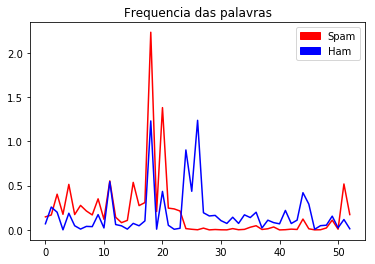

In [171]:
plt.plot(spam_mean[0:-5], color = 'r', label = 'spam')
plt.plot(ham_mean[0:-5], color = 'b', label = 'ham')
plt.title('Frequencia das palavras')

red = mpatches.Patch(color='red', label='Spam')
blue = mpatches.Patch(color = 'blue', label = 'Ham')
plt.legend(handles=[red,blue])

plt.show()

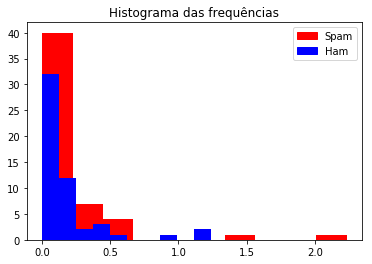

In [172]:
plt.hist(spam_mean[0:-5], bins = 10, color = 'r')
plt.hist(ham_mean[0:-5], bins = 10, color = 'b')
plt.title('Histograma das frequências')

red = mpatches.Patch(color='red', label='Spam')
blue = mpatches.Patch(color = 'blue', label = 'Ham')
plt.legend(handles=[red,blue])

plt.show()

Além de visualizar as médias com os gráficos, posso comparar ham e spam usando o método groupby de pandas.

In [77]:
groupby_ham = train.groupby(['ham']) #criação de um objeto groupby a partir das colunas do dataframe

In [78]:
#permite a visualização de todas as colunas do meu dataset no jupyter
from IPython.display import display
pd.options.display.max_columns = None
display(groupby_ham.mean())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
ham,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.147411,0.168530,0.403471,0.176263,0.514437,0.173527,0.277110,0.213912,0.169398,0.351176,0.119937,0.553856,0.143387,0.082113,0.10774,0.537012,0.274633,0.308971,2.233142,0.208223,1.381603,0.246242,0.237313,0.213506,0.014801,0.007229,0.001700,0.020343,0.000455,0.004514,0.001337,0.000658,0.014913,0.002050,0.006046,0.030462,0.047390,0.005024,0.013128,0.033219,0.000000,0.002512,0.008789,0.005213,0.122806,0.012834,0.000658,0.002008,0.022148,0.110498,0.008519,0.519001,0.173251,0.073404,10.038973,107.273618,479.303009,2280.833450
1,0.069374,0.258156,0.200013,0.001097,0.188223,0.047024,0.009427,0.039778,0.037175,0.172821,0.022372,0.545269,0.060800,0.046144,0.00892,0.073621,0.046735,0.101857,1.231231,0.008490,0.434807,0.052466,0.007308,0.018734,0.903261,0.436455,1.238072,0.194016,0.157677,0.164016,0.104718,0.073465,0.143207,0.073661,0.170347,0.139609,0.199782,0.022026,0.110036,0.082248,0.068836,0.220138,0.072230,0.110458,0.420413,0.291830,0.007041,0.048045,0.053084,0.155570,0.023539,0.117427,0.012902,0.024232,2.397710,18.269658,158.898267,2307.981786


## Feature engineering

Agora vou tentar extrair os dados/as features mais relevantes do meu dataset.

### Matriz de correlação 

A matriz de correlação é um indicativo do quão relacionada as variáveis estão entre si e com o target ham

In [79]:
corr = train.corr()

In [80]:
corr.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
word_freq_make,1.000000,-0.013974,0.076656,0.006541,0.023160,0.057049,0.000911,-0.005773,0.112229,0.033424,0.164645,0.105594,0.067216,0.029311,0.029519,0.064370,0.077827,0.068541,0.122546,0.032594,0.187010,-0.020811,0.136615,0.190361,-0.071458,-0.064121,-0.062505,-0.047135,-0.041281,-0.050976,-0.039047,-0.029691,-0.037852,-0.026122,-0.039912,-0.051991,-0.057833,-0.009987,-0.009861,-0.032649,-0.014158,-0.027064,-0.017844,-0.022559,-0.042356,-0.044976,0.009520,-0.012360,-0.025695,-0.027604,-0.033050,0.059160,0.109941,-0.008510,0.045359,0.058111,0.084878,-0.127528,0.004666
word_freq_address,-0.013974,1.000000,-0.035004,-0.007068,-0.028245,-0.026792,0.006406,-0.016762,-0.004134,0.030859,-0.007649,-0.043118,-0.018045,-0.010791,0.001819,-0.009404,-0.017721,0.032803,-0.056778,-0.017996,-0.018782,-0.007781,-0.024014,0.002846,-0.043425,-0.038420,-0.029872,-0.028981,-0.021028,-0.027311,-0.016561,-0.003918,-0.024373,-0.004983,-0.022906,-0.028376,-0.022184,-0.009536,-0.017936,-0.013535,-0.015090,-0.026291,0.001315,-0.020441,-0.015923,-0.023487,-0.010072,-0.014399,-0.005406,-0.051148,-0.019552,-0.014227,-0.011218,-0.004215,0.000377,-0.003184,-0.025153,0.032665,-0.006546
word_freq_all,0.076656,-0.035004,1.000000,-0.019639,0.066843,0.091734,0.037647,0.012201,0.093231,0.033102,0.054538,0.089757,0.035248,0.009768,0.125393,0.061848,0.029085,0.126461,0.135951,0.045440,0.164100,-0.035222,0.129483,0.043422,-0.082552,-0.058666,-0.103909,-0.041438,-0.055762,-0.035303,-0.034574,-0.059952,-0.049905,-0.059336,-0.044265,-0.043243,-0.078808,0.036934,-0.019095,-0.046073,-0.032253,0.005012,-0.046093,-0.053803,-0.050119,-0.058389,-0.007499,-0.028270,-0.030522,-0.006366,-0.032121,0.108741,0.085535,0.008170,0.094282,0.100430,0.070105,-0.194983,0.032176
word_freq_3d,0.006541,-0.007068,-0.019639,1.000000,0.001192,-0.009594,0.013936,0.003564,-0.002184,-0.003528,-0.013678,-0.018468,-0.012977,0.004090,0.004458,0.006437,-0.005606,0.018444,-0.006919,-0.006915,0.005064,0.033898,0.017604,0.026104,-0.015649,-0.014303,-0.010856,-0.010673,-0.007938,-0.010858,-0.007605,-0.006782,-0.008249,-0.006814,-0.005628,-0.006009,-0.006918,-0.002871,-0.003743,-0.007602,-0.005944,-0.008473,-0.009496,-0.006238,-0.012891,-0.009596,-0.003550,-0.001039,-0.002425,-0.010957,-0.007479,-0.003653,0.009133,0.000533,0.005358,0.016938,0.023434,-0.059354,-0.021531
word_freq_our,0.023160,-0.028245,0.066843,0.001192,1.000000,0.049377,0.146824,0.030255,0.025203,0.033507,0.075927,0.060950,0.030995,0.011387,0.046169,0.078574,0.135221,0.049994,0.104479,0.041819,0.134844,-0.019770,0.056089,-0.001681,-0.065359,-0.072506,-0.083513,-0.059388,0.004599,-0.048686,-0.038099,-0.026349,-0.022517,-0.026224,-0.044208,-0.042385,-0.076262,0.142609,-0.045432,-0.020854,-0.047303,0.101476,-0.053176,0.021722,-0.039789,-0.078416,-0.025658,-0.027911,-0.035840,-0.045330,-0.025790,0.015789,0.037120,-0.009517,0.048087,0.045400,0.002320,-0.227924,-0.001257


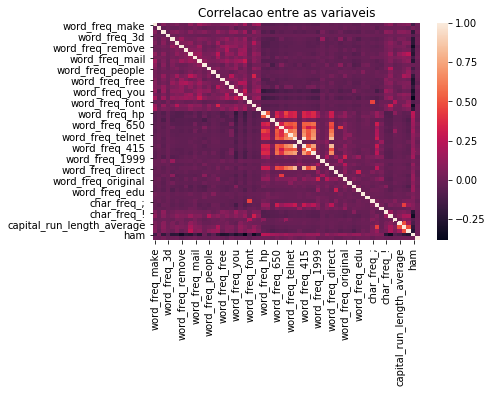

In [81]:
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool)) #correlação entre todas as variáveis
plt.title("Correlacao entre as variaveis")
plt.show()

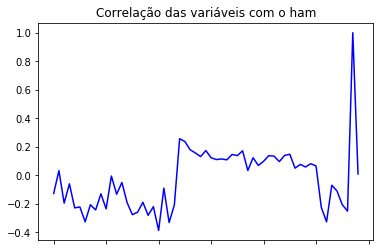

In [82]:
corr['ham'].plot(color = 'b')
plt.title('Correlação das variáveis com o ham')
plt.show()

É fácil perceber que algumas variáveis apresentam alta correlação, enquanto outras apresentam baixa. Além dos gráficos, é possível analisar também os valores numéricos dessa correlação.

In [83]:
corr['ham'].sort_values()

word_freq_your               -0.386209
word_freq_000                -0.330788
char_freq_$                  -0.326111
word_freq_remove             -0.325675
word_freq_you                -0.280411
word_freq_free               -0.275930
word_freq_business           -0.258169
capital_run_length_total     -0.250509
word_freq_order              -0.242665
word_freq_receive            -0.235185
word_freq_our                -0.227924
char_freq_!                  -0.224435
word_freq_over               -0.222251
word_freq_credit             -0.219851
word_freq_money              -0.207387
capital_run_length_longest   -0.206227
word_freq_internet           -0.206066
word_freq_all                -0.194983
word_freq_addresses          -0.191673
word_freq_email              -0.188924
word_freq_people             -0.132616
word_freq_mail               -0.129478
word_freq_make               -0.127528
capital_run_length_average   -0.110157
word_freq_font               -0.089653
char_freq_#              

A maior correlação (em módulo) é de 0.38.

### Criando novas colunas com valores binários 

A correlação das variáveis com o ham é relativamente baixa, então vou mudar a forma dos meus dados para tentar aumentá-la. Usarei valores binários para identificar valores maiores ou menores que a media da coluna.

In [4]:
#criando novas colunas no dataframe com esses valores binários
for column in train.columns:
    binary = []
    for item in train[column]:
        if item > train[column].mean():
            binary.append(1)
        else:
            binary.append(0)
    train[column + '_avg'] = binary

In [5]:
train_avg = train[train.columns[57:]] #seleciono apenas as novas colunas criadas com o codigo acima
train_avg = train_avg.drop(labels = ['Id_avg', 'ham_avg'], axis = 1)
train_avg.head()

,ham,Id,word_freq_make_avg,word_freq_address_avg,word_freq_all_avg,word_freq_3d_avg,word_freq_our_avg,word_freq_over_avg,word_freq_remove_avg,word_freq_internet_avg,...,word_freq_conference_avg,char_freq_;_avg,char_freq_(_avg,char_freq_[_avg,char_freq_!_avg,char_freq_$_avg,char_freq_#_avg,capital_run_length_average_avg,capital_run_length_longest_avg,capital_run_length_total_avg
0,1,1947,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2159,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,4223,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,2624,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2743,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agora vou plotar a matriz de correlação com esses novos dados, considerando valores binários que indicam se o valor é maior ou menor que a média.

Text(0.5,1,'Correlação entre as features binárias')

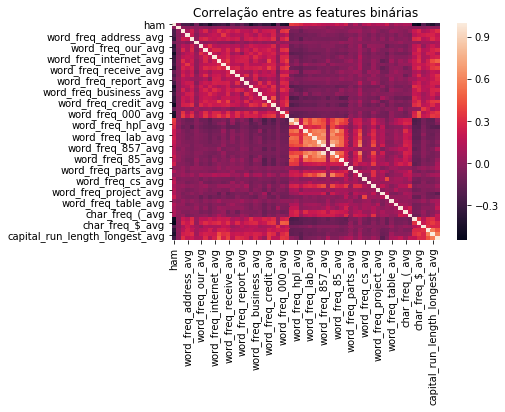

In [86]:
sns.heatmap(train_avg.corr(), mask=np.zeros_like(train_avg.corr(), dtype=np.bool))
plt.title('Correlação entre as features binárias')

In [87]:
train_avg.corr()['ham'].sort_values()

char_freq_$_avg                  -0.545690
char_freq_!_avg                  -0.494134
word_freq_your_avg               -0.484209
word_freq_remove_avg             -0.467407
word_freq_free_avg               -0.454362
word_freq_money_avg              -0.445464
capital_run_length_longest_avg   -0.420894
word_freq_000_avg                -0.414538
word_freq_our_avg                -0.364880
capital_run_length_average_avg   -0.352642
word_freq_receive_avg            -0.348543
word_freq_all_avg                -0.339761
word_freq_you_avg                -0.334814
word_freq_business_avg           -0.332218
word_freq_credit_avg             -0.326257
word_freq_internet_avg           -0.324180
word_freq_over_avg               -0.309978
capital_run_length_total_avg     -0.299510
word_freq_order_avg              -0.294143
word_freq_email_avg              -0.267161
word_freq_mail_avg               -0.261782
word_freq_addresses_avg          -0.251165
word_freq_address_avg            -0.246977
word_freq_m

É possível perceber que a correlação entre as features e o ham aumentou. Com essa nova informação, vou selecionar do meu dataset apenas as features com maior correlação para fazer o meu modelo.

In [11]:
train_c = train[['ham', 'char_freq_$_avg', 'char_freq_!_avg', 'word_freq_your_avg', 'word_freq_remove_avg', 'word_freq_free_avg', 'word_freq_money_avg', 'word_freq_000_avg', 'word_freq_our_avg', 'word_freq_receive_avg', 'word_freq_all_avg', 'word_freq_you_avg','word_freq_business_avg', 'word_freq_credit_avg', 'word_freq_internet_avg', 'word_freq_you_avg', 'word_freq_your', 'word_freq_000', 'char_freq_$', 'word_freq_remove']]


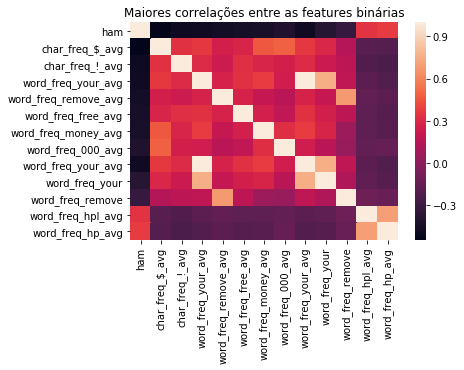

In [7]:
sns.heatmap(train_c.corr(), mask=np.zeros_like(train_c.corr(), dtype=np.bool))
plt.title('Maiores correlações entre as features binárias')

plt.show()

In [90]:
train_c.corr()['ham'].sort_values()

char_freq_$_avg          -0.545690
char_freq_!_avg          -0.494134
word_freq_your_avg       -0.484209
word_freq_remove_avg     -0.467407
word_freq_free_avg       -0.454362
word_freq_money_avg      -0.445464
word_freq_000_avg        -0.414538
word_freq_your           -0.386209
word_freq_our_avg        -0.364880
word_freq_receive_avg    -0.348543
word_freq_all_avg        -0.339761
word_freq_you_avg        -0.334814
word_freq_you_avg        -0.334814
word_freq_business_avg   -0.332218
word_freq_000            -0.330788
word_freq_credit_avg     -0.326257
char_freq_$              -0.326111
word_freq_remove         -0.325675
word_freq_internet_avg   -0.324180
ham                       1.000000
Name: ham, dtype: float64

## Criação de um modelo

In [ ]:
train_c = train[['ham', 'char_freq_$_avg', 'char_freq_!_avg', 'word_freq_your_avg', 'word_freq_remove_avg', 'word_freq_free_avg', 'word_freq_money_avg', 'word_freq_000_avg', 'word_freq_our_avg', 'word_freq_you_avg','word_freq_credit_avg', 'word_freq_business_avg''word_freq_internet_avg', 'word_freq_you_avg', 'capital_run_length_total_avg', 'word_freq_your', 'word_freq_000', 'char_freq_$', 'word_freq_remove']]


Primeiro vou separar os meus dados nas features(x) e no target(y)

In [23]:
x_train = train_c.drop(['ham'], axis = 1)
y_train = train_c['ham']

Criação de um scorer F3 para usar na validação cruzada.

In [24]:
from sklearn.metrics import fbeta_score, make_scorer
f3 = make_scorer(fbeta_score, beta=3)

### Modelo de naive bayes 

O naive bayes de bernoulli foi usado devido ao fato de as features e o target serem binários.

In [25]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

bernoulli = BernoulliNB(alpha = 0.000001)

print('Score F3 Bernoulli: ', np.mean(cross_val_score(bernoulli, x_train, y_train, scoring = f3, cv = 5)))

bernoulli.fit(x_train, y_train)

Score F3 Bernoulli:  0.9266097306319334


BernoulliNB(alpha=1e-06, binarize=0.0, class_prior=None, fit_prior=True)

### Matriz de confusão 

Além de avaliar o F3, vou olhar também a matriz de confusão do meu classificador.

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(bernoulli, x_train, y_train, cv=5)
confusion = confusion_matrix(y_train, y_pred)

In [16]:
print(confusion)

[[1148  281]
 [ 139 2112]]


A matriz de confusão do sklearn é montada da seguinte forma :

          True
            0   TN   FP

            1   FN   TP

                0    1    Predicted
         
Assim os rates podem ser calculados manualmente (true positive rate = 2112/(2112+139) e false positive rate = 281/(281+1148)) ou com o auxílio de uma ferramente do sklearn voltada para fazer a curva ROC.

In [31]:
from sklearn.metrics import roc_curve

In [97]:
fpr, tpr, threshold = roc_curve(y_train, y_pred)
print('False positive rate:', fpr[1])
print('True positive rate:', tpr[1])

False positive rate: 0.1966410076976907
True positive rate: 0.938249666814749


### Curva ROC

Para avaliar a curva ROC antes vou separar o meu dataset em dois: um de treino e um para validação.

In [98]:
from sklearn.model_selection import train_test_split

x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.25)

Depois de separa-lo, vou refazer o fit do meu classificador e predizer não os labels, mas as probabilidades de ser cada label.

In [100]:
bernoulli.fit(x_train2, y_train2)

BernoulliNB(alpha=1e-06, binarize=0.0, class_prior=None, fit_prior=True)

In [101]:
pred_prob = bernoulli.predict_proba(x_val)

Com essas probabilidades é possível montar um dataframe para entender melhor o seu significado e o funcionamento do meu classificador.

In [145]:
scores = pd.DataFrame(pred_prob)
scores.columns = ['Prob Spam (0)', 'Prob Ham (1)']
scores['Real'] = y_val
scores = scores.fillna(value = 0)
scores.head()

,Prob Spam (0),Prob Ham (1),Real
0,0.001244,0.998756,1.0
1,0.001740,0.998260,0.0
2,0.599064,0.400936,0.0
3,0.016219,0.983781,1.0
4,0.975995,0.024005,0.0


Agora que já tenho tudo isso, é possível montar a curva ROC.

In [149]:
fpr, tpr, thresholds = roc_curve(y_val, pred_prob[:, 1])

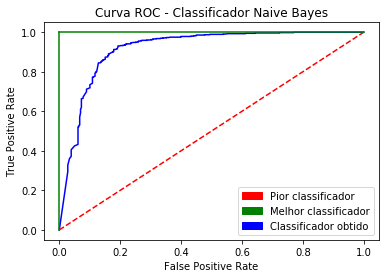

In [170]:
plt.figure()

plt.plot(fpr, tpr, color ='blue')
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.plot([0,0], [0,1], [1,1], color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Classificador Naive Bayes')


red = mpatches.Patch(color='red', label='Pior classificador')
green = mpatches.Patch(color = 'green', label = 'Melhor classificador')
blue = mpatches.Patch(color = 'blue', label = 'Classificador obtido')
plt.legend(handles=[red, green, blue])

plt.show()


## Modelo de KNN

Antes de implementar o modelo de KNN, vou analisar como a quantidade de neighbors ajuda no score do meu modelo.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i, p = 2)
    print(i, np.mean(cross_val_score(knn, x_train, y_train, scoring = f3, cv = 5)))

1 0.9176292026187853
2 0.8444096110473609
3 0.9390368147675765
4 0.919104269931805
5 0.9498545970069501
6 0.9398251699482355
7 0.9535031139942444
8 0.9459497427283908
9 0.9563855569416994
10 0.9526807133285043
11 0.9564712959365673
12 0.9540674635282732
13 0.9560732678145992
14 0.9546754108628001
15 0.9575721848567454
16 0.9574949851866841
17 0.9591780356022579
18 0.957928924890312
19 0.9607544523360151
20 0.9579464371148412
21 0.9617060224964856
22 0.9598805302171375
23 0.9635558256265752
24 0.9618324713151137
25 0.962697485653301
26 0.9617496813580374
27 0.9641234591758078
28 0.9627827584645214
29 0.9634781772400579
30 0.9628143901517507
31 0.9633245147211318
32 0.9625625867188312
33 0.9622434147215037
34 0.9608331241634636
35 0.9611606429175366
36 0.9589029749653936
37 0.9607654372397475
38 0.9589209684530049
39 0.9601629055536683


Escolho K = 23, que me deu o maior f3 (0.9635)

In [150]:
knn = KNeighborsClassifier(n_neighbors = 37, p = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=37, p=1,
           weights='uniform')

## Unindo os dois classificadores 

Além de analisar os classificadores indivualmente, vou uní-los para tentar obter um score melhor. 

In [34]:
from sklearn.ensemble import VotingClassifier

combine = VotingClassifier(estimators=[('bernoulli', bernoulli), ('knn', knn)], voting='soft', weights = [2,5])
print(np.mean(cross_val_score(combine, x_train, y_train, scoring = f3, cv = 5)))

combine.fit(x_train, y_train)


C:\Users\Beatriz Passanezi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Beatriz Passanezi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Beatriz Passanezi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9622873844360198


C:\Users\Beatriz Passanezi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Beatriz Passanezi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


VotingClassifier(estimators=[('bernoulli', BernoulliNB(alpha=1e-06, binarize=0.0, class_prior=None, fit_prior=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=39, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[2, 5])

Com os dois classificadores, consegui um fbeta um pouco maior do que só o de Bernoulli

## Banco de testes 

Vou realizar o mesmo tratamento feito cmo meus dados de treino com os dados de teste para, depois, fazer a minha previsão.

In [158]:
test = pd.read_csv('test_features.csv')


In [159]:
for column in test.columns:
    binary = []
    for item in test[column]:
        if item > test[column].mean():
            binary.append(1)
        else:
            binary.append(0)
    test[column + '_avg'] = binary

In [161]:
test = test[['char_freq_$_avg', 'char_freq_!_avg', 'word_freq_your_avg', 'word_freq_remove_avg', 'word_freq_free_avg', 'word_freq_money_avg', 'word_freq_000_avg', 'word_freq_our_avg', 'word_freq_receive_avg', 'word_freq_all_avg', 'word_freq_you_avg','word_freq_business_avg', 'word_freq_credit_avg', 'word_freq_internet_avg', 'word_freq_you_avg', 'word_freq_your', 'word_freq_000', 'char_freq_$', 'word_freq_remove']]

Agora que fiz o tratamento, vou só verificar se o meu arquivo de treino possui o mesmo numero de colunas do meu arquivo de teste.

In [162]:
x_train.shape

(3680, 19)

In [163]:
test.shape

(921, 19)

Os dois possuem o mesmo numero de colunas, então posso fazer a previsão.

In [164]:
predict_combine = combine.predict(test)
predict_bernoulli = bernoulli.predict(test)
predict_knn = knn.predict(test)

C:\Users\Beatriz Passanezi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Criação de um novo dataframe com os targets previstos e criação de um arquivo csv com eles.

In [165]:
sample = pd.read_csv('sample_submission_1.csv')
submit = sample.drop(['ham'], axis = 1)
submit['ham'] = predict_combine
submit = submit.set_index('Id')
submit.head()
submit.to_csv('submission_c4.csv')

In [166]:
sample = pd.read_csv('sample_submission_1.csv')
submit = sample.drop(['ham'], axis = 1)
submit['ham'] = predict_bernoulli
submit = submit.set_index('Id')
submit.head()
submit.to_csv('submission_b4.csv')

In [167]:
sample = pd.read_csv('sample_submission_1.csv')
submit = sample.drop(['ham'], axis = 1)
submit['ham'] = predict_knn
submit = submit.set_index('Id')
submit.head()
submit.to_csv('submission_k4.csv')